<a href="https://colab.research.google.com/github/nikhilsingh-hub/Autism-Spectrum-Disorder-Predictor/blob/main/ASD_MID2__CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import tensorflow as tf
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv3D,Conv2D, MaxPooling2D,TimeDistributed,LSTM,ConvLSTM2D
from keras.utils import np_utils

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
# Define Constants
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras import optimizers , layers, applications

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
filenames = os.listdir("../content/drive/MyDrive/Major_2datasets/AutismDataset/train")

In [ ]:

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,Non_Autistic.112.jpg,0
1,Non_Autistic.1208.jpg,0
2,Autistic.901.jpg,1
3,Non_Autistic.184.jpg,0
4,Non_Autistic.215.jpg,0


In [ ]:
df.tail()

,filename,category
2535,Autistic.515.jpg,1
2536,Autistic.320.jpg,1
2537,Autistic.235.jpg,1
2538,Autistic.496.jpg,1
2539,Autistic.222.jpg,1


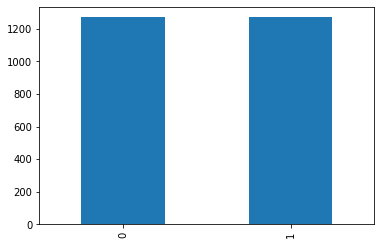

In [ ]:
df['category'].value_counts().plot.bar()

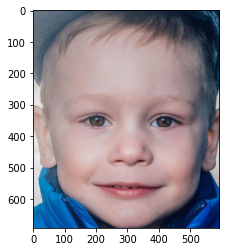

In [ ]:
sample = random.choice(filenames)
image = load_img("../content/drive/MyDrive/Major_2datasets/AutismDataset/train/"+sample)
plt.imshow(image)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_regularizer = 'l2'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding = 'same', kernel_regularizer = 'l2'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', kernel_regularizer = 'l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(layers.TimeDistributed(Flatten()))
model.add(layers.LSTM(128, return_sequences= True, activation = 'tanh'))
model.add(layers.LSTM(60, activation = 'tanh'))

model.add(Dense(64, kernel_regularizer = 'l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.LeakyReLU())

model.add(Dense(32, kernel_regularizer = 'l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.LeakyReLU())

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 10)      280       
                                                                 
 batch_normalization_15 (Bat  (None, 126, 126, 10)     40        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 10)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 10)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 63, 63, 32)        2912      
                                                                 
 batch_normalization_16 (Bat  (None, 63, 63, 32)      

In [ ]:
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from tensorflow.nn import relu

In [ ]:
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.5,
                                            min_delta = 1e-4,
                                            min_lr=0.00001,
                                            mode = 'max')

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# Prepare Data
df["category"] = df["category"].replace({0: 'Non_Autistic', 1: 'Autistic'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

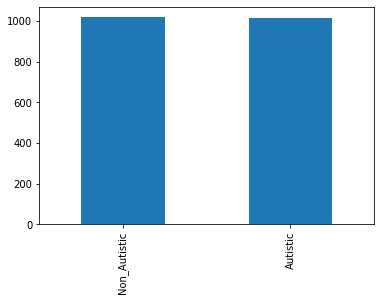

In [ ]:
train_df['category'].value_counts().plot.bar()

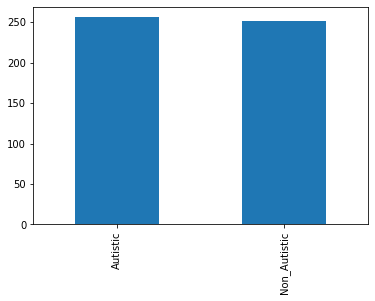

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "../content/drive/MyDrive/Major_2datasets/AutismDataset/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
)

Found 2032 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "../content/drive/MyDrive/Major_2datasets/AutismDataset/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
)

Found 508 validated image filenames belonging to 2 classes.


In [ ]:
epochs=3 if FAST_RUN else 12
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    # validation_steps=total_validate//batch_size,
    # steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/12
64/64 [==============================] - ETA: 0s - loss: 3.0811 - accuracy: 0.5630

64/64 [==============================] - 346s 5s/step - loss: 3.0811 - accuracy: 0.5630 - val_loss: 2.6567 - val_accuracy: 0.4961 - lr: 0.0010
Epoch 2/12
64/64 [==============================] - ETA: 0s - loss: 2.4357 - accuracy: 0.5704

64/64 [==============================] - 197s 3s/step - loss: 2.4357 - accuracy: 0.5704 - val_loss: 2.0726 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 3/12
64/64 [==============================] - ETA: 0s - loss: 1.9042 - accuracy: 0.5709

64/64 [==============================] - 199s 3s/step - loss: 1.9042 - accuracy: 0.5709 - val_loss: 1.7122 - val_accuracy: 0.4961 - lr: 0.0010
Epoch 4/12
64/64 [==============================] - ETA: 0s - loss: 1.5466 - accuracy: 0.5950

64/64 [==============================] - 198s 3s/step - loss: 1.5466 - accuracy: 0.5950 - val_loss: 1.4145 - val_accuracy: 0.5039 - lr: 0.0010
Epoch 5/12
64/64 [==============================] - ETA: 0s - loss: 1.3330 - accuracy: 0.5674

64/64 [==============================] - 199s 3s/step - loss: 1.3330 - accuracy: 0.5674 - val_loss: 1.2025 - val_accuracy: 0.5709 - lr: 0.0010
Epoch 6/12
64/64 [==============================] - ETA: 0s - loss: 1.1479 - accuracy: 0.5856

64/64 [==============================] - 192s 3s/step - loss: 1.1479 - accuracy: 0.5856 - val_loss: 1.1545 - val_accuracy: 0.4980 - lr: 0.0010
Epoch 7/12
64/64 [==============================] - ETA: 0s - loss: 1.0386 - accuracy: 0.6127

64/64 [==============================] - 192s 3s/step - loss: 1.0386 - accuracy: 0.6127 - val_loss: 0.9934 - val_accuracy: 0.5925 - lr: 0.0010
Epoch 8/12
64/64 [==============================] - ETA: 0s - loss: 0.9595 - accuracy: 0.6137

64/64 [==============================] - 196s 3s/step - loss: 0.9595 - accuracy: 0.6137 - val_loss: 1.0501 - val_accuracy: 0.5157 - lr: 0.0010
Epoch 9/12
64/64 [==============================] - ETA: 0s - loss: 0.8956 - accuracy: 0.6235

64/64 [==============================] - 199s 3s/step - loss: 0.8956 - accuracy: 0.6235 - val_loss: 0.9444 - val_accuracy: 0.5079 - lr: 0.0010
Epoch 10/12
64/64 [==============================] - ETA: 0s - loss: 0.8299 - accuracy: 0.6452

64/64 [==============================] - 195s 3s/step - loss: 0.8299 - accuracy: 0.6452 - val_loss: 0.8632 - val_accuracy: 0.5079 - lr: 0.0010
Epoch 11/12
64/64 [==============================] - ETA: 0s - loss: 0.7867 - accuracy: 0.6496

64/64 [==============================] - 196s 3s/step - loss: 0.7867 - accuracy: 0.6496 - val_loss: 0.7667 - val_accuracy: 0.6516 - lr: 0.0010
Epoch 12/12
64/64 [==============================] - ETA: 0s - loss: 0.7374 - accuracy: 0.6531

64/64 [==============================] - 198s 3s/step - loss: 0.7374 - accuracy: 0.6531 - val_loss: 0.7702 - val_accuracy: 0.6161 - lr: 0.0010


In [ ]:
model.save_weights("model.h5")

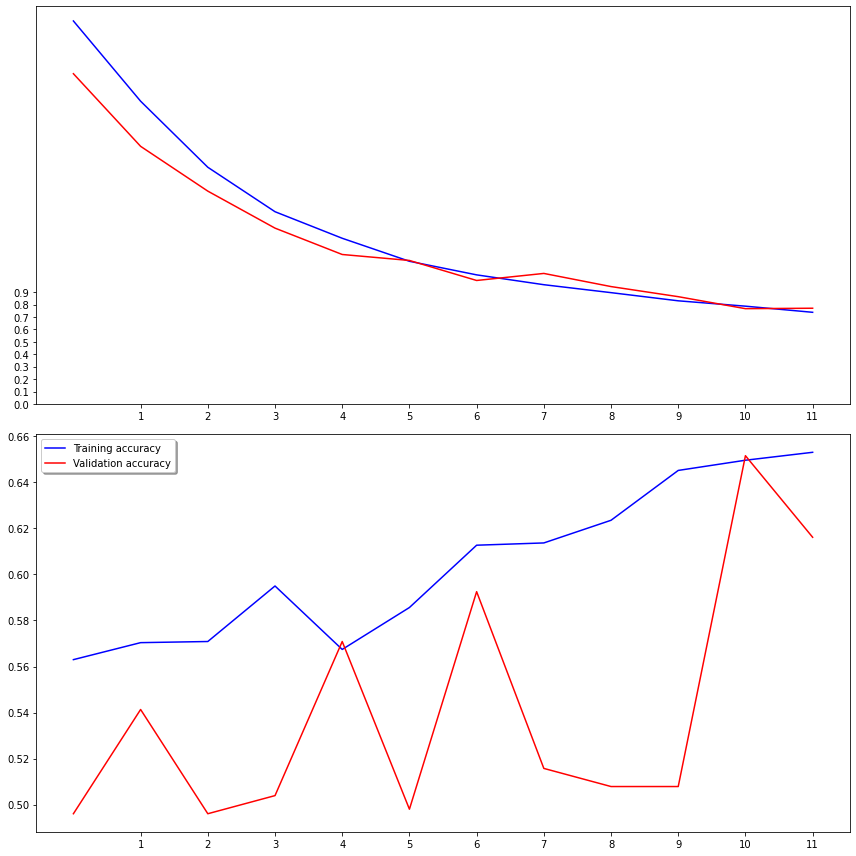

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("../content/drive/MyDrive/Major_2datasets/AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "../content/drive/MyDrive/Major_2datasets/AutismDataset/test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 300 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({ 'Autistic': 1, 'Non_Autistic': 0 })

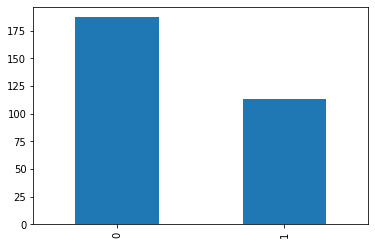

In [ ]:
test_df['category'].value_counts().plot.bar()

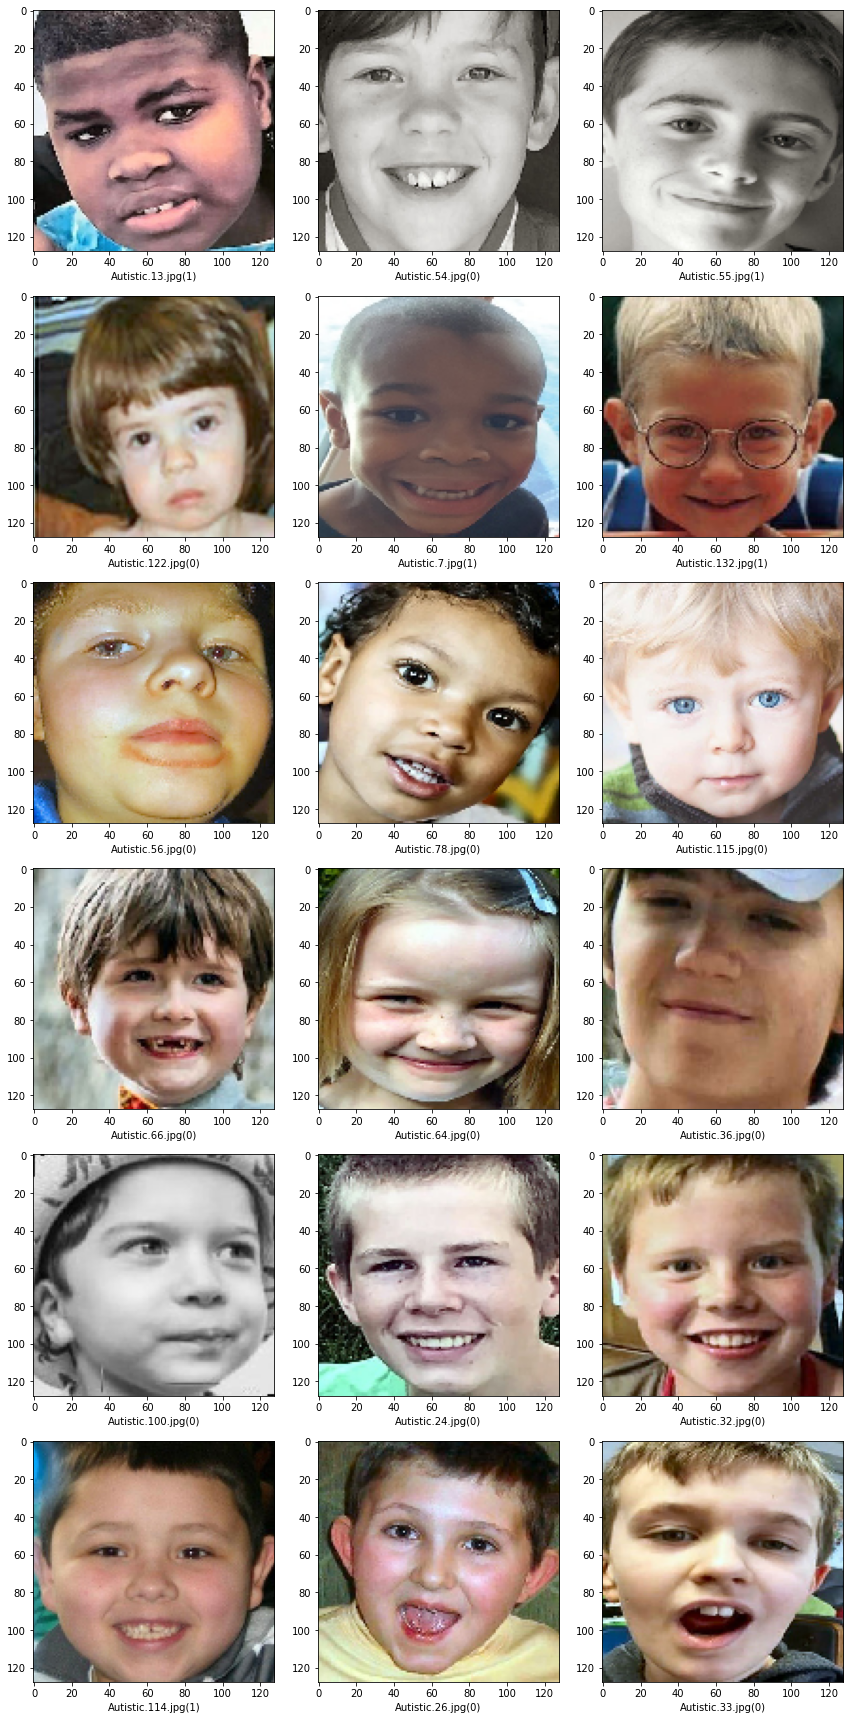

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../content/drive/MyDrive/Major_2datasets/AutismDataset/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv("submission.csv")

,id,label
0,Autistic,1
1,Autistic,0
2,Autistic,1
3,Autistic,0
4,Autistic,1
...,...,...
295,Autistic,1
296,Non_Autistic,0
297,Non_Autistic,0
298,Non_Autistic,0
